<strong>Report Title:</strong> Final Project - Analysis Plan <br>
<strong>Name:</strong> Kendall Williams <br>
<strong>Date:</strong> 11/25/25

### Data Analysis
For my data analysis, I want to use the information I gather from the DataFrames to create bar graphs that represent the correlations of the categorical data from both the owl and forest datasets. Then I want to create another plot comparing both DataFrames together or side by side to see the possible correlation between owl's range and forest coverage. I think this will work best, because most of my data is categorical rather than numerical. I think this method would allow me to analyze the data by groups and plot the data in easier to read bar graphs. 

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols

### Barn Owl Range Data

In [123]:
owls_df = pd.read_csv(r'\Users\kwill\Downloads\brnowl_regional_2023\brnowl_regional_2023.csv')
print(owls_df.head(10))

  species_code        common_name scientific_name  prediction_year  \
0       brnowl  American Barn Owl    Tyto furcata             2023   
1       brnowl  American Barn Owl    Tyto furcata             2023   
2       brnowl  American Barn Owl    Tyto furcata             2023   
3       brnowl  American Barn Owl    Tyto furcata             2023   
4       brnowl  American Barn Owl    Tyto furcata             2023   
5       brnowl  American Barn Owl    Tyto furcata             2023   
6       brnowl  American Barn Owl    Tyto furcata             2023   
7       brnowl  American Barn Owl    Tyto furcata             2023   
8       brnowl  American Barn Owl    Tyto furcata             2023   
9       brnowl  American Barn Owl    Tyto furcata             2023   

  region_type region_code            region_name continent_code  \
0     country         ARG              Argentina             SA   
1     country         BHS            The Bahamas            NaN   
2     country         BLZ   

In [90]:
owls_df.describe(include='object')

,species_code,common_name,scientific_name,region_type,region_code,region_name,continent_code,continent_name,season,start_date,end_date,max_week
count,584,584,584,584,584,584,251,584,584,584,584,584
unique,1,1,1,2,584,549,1,2,1,1,1,42
top,brnowl,American Barn Owl,Tyto furcata,state,VEN-65,Saint Andrew,SA,North America,year_round,2023-01-04,2023-12-27,2023-12-13
freq,584,584,584,546,1,4,251,333,584,584,584,119


In [91]:
owls_df.describe(include='all')

,species_code,common_name,scientific_name,prediction_year,region_type,region_code,region_name,continent_code,continent_name,season,start_date,end_date,abundance_mean,total_pop_percent,continent_pop_percent,range_occupied_percent,range_total_percent,range_days_occupation,max_week,max_week_percent_pop
count,584,584,584,584.0,584,584,584,251,584,584,584,584,5.840000e+02,5.840000e+02,5.840000e+02,584.000000,5.840000e+02,584.000000,584,5.840000e+02
unique,1,1,1,NaN,2,584,549,1,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,42,NaN
top,brnowl,American Barn Owl,Tyto furcata,NaN,state,VEN-65,Saint Andrew,SA,North America,year_round,2023-01-04,2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-13,NaN
freq,584,584,584,NaN,546,1,4,251,333,584,584,584,NaN,NaN,NaN,NaN,NaN,NaN,119,NaN
mean,NaN,NaN,NaN,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.741334e-02,3.424658e-03,6.849315e-03,0.632256,3.424658e-03,364.375000,NaN,5.005103e-03
std,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.416632e-02,2.076583e-02,3.199829e-02,0.332982,1.828295e-02,15.103807,NaN,2.685064e-02
min,NaN,NaN,NaN,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.946470e-07,2.198357e-09,4.072092e-09,0.000644,6.196890e-08,0.000000,NaN,1.407931e-07
25%,NaN,NaN,NaN,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.128309e-03,1.363343e-05,8.506340e-05,0.351990,4.933115e-05,365.000000,NaN,4.462053e-05
50%,NaN,NaN,NaN,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.142495e-02,1.163052e-04,4.229286e-04,0.744703,2.896430e-04,365.000000,NaN,2.966333e-04
75%,NaN,NaN,NaN,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.109549e-02,9.755678e-04,2.636278e-03,0.933525,1.465844e-03,365.000000,NaN,1.910329e-03


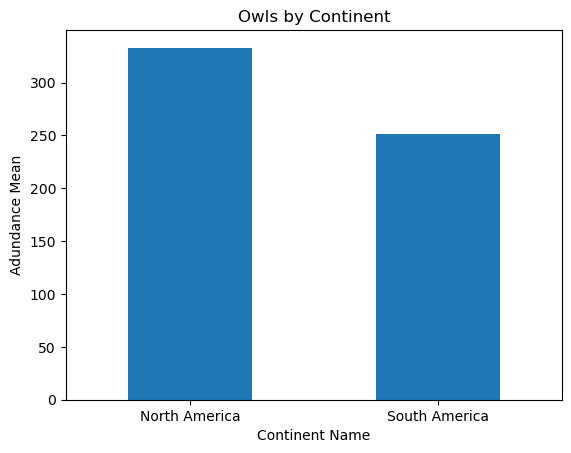

In [97]:
owls_df["continent_name"].value_counts().plot(kind="bar", rot= 0)
plt.title("Owls by Continent")
plt.xlabel("Continent Name")
plt.ylabel("Adundance Mean")
plt.show()

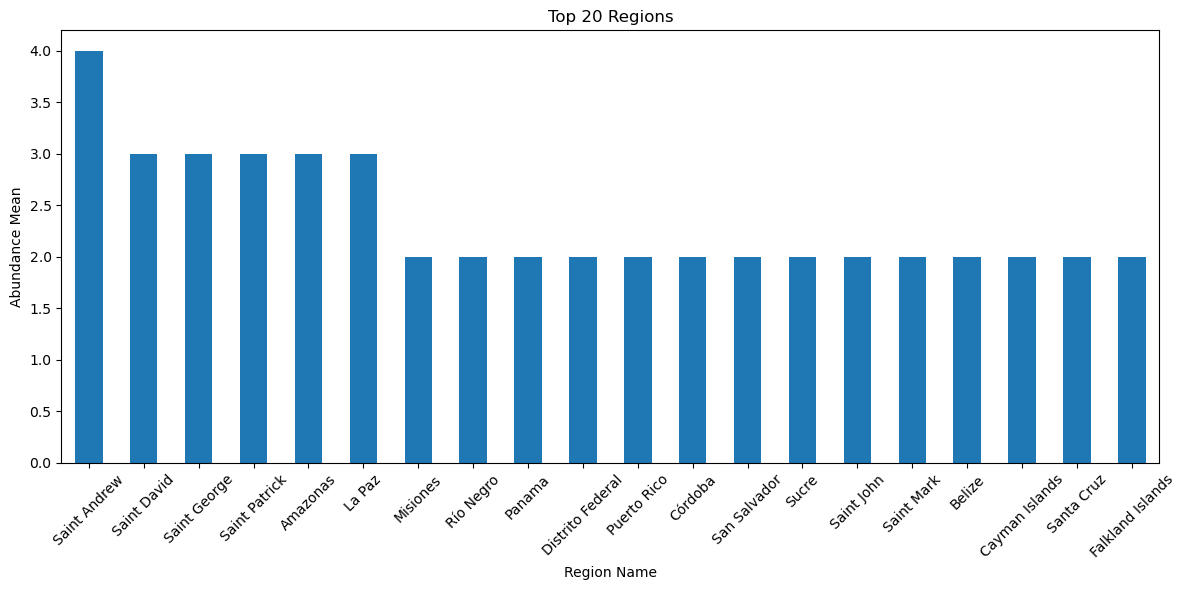

In [130]:
plt.figure(figsize=(12, 6))   
counts = owls_df["region_name"].value_counts()
top20 = counts.head(20)
top20.plot(kind="bar", rot=45)
plt.title("Top 20 Regions")
plt.xlabel("Region Name")
plt.ylabel("Abundance Mean")
plt.tight_layout()
plt.show()


### Forest Loss/Coverage Data


In [136]:
url = "https://ourworldindata.org/grapher/annual-change-forest-area.csv?v=1&csvType=full&useColumnShortNames=true"
forest_df = pd.read_csv(url)
print(forest_df.head(10))

      Entity Code  Year  Annual net change in forest area
0    Algeria  DZA  1990                           -8800.0
1    Algeria  DZA  2000                           33900.0
2    Algeria  DZA  2010                            7600.0
3    Algeria  DZA  2015                           -1400.0
4  Argentina  ARG  1990                         -182600.0
5  Argentina  ARG  2000                         -316400.0
6  Argentina  ARG  2010                         -223400.0
7  Argentina  ARG  2015                         -104800.0
8      Aruba  ABW  1990                               0.0
9      Aruba  ABW  2000                               0.0


In [65]:
forest_df.head()[["Entity", "Year", "Code","Annual net change in forest area"]]

,Entity,Year,Code,Annual net change in forest area
0,Algeria,1990,DZA,-8800.0
1,Algeria,2000,DZA,33900.0
2,Algeria,2010,DZA,7600.0
3,Algeria,2015,DZA,-1400.0
4,Argentina,1990,ARG,-182600.0


In [137]:
forest_df.describe(include='object')

,Entity,Code
count,475,471
unique,132,131
top,Algeria,DZA
freq,4,4


In [138]:
forest_df.describe(include='all')

,Entity,Code,Year,Annual net change in forest area
count,475,471,475.000000,4.750000e+02
unique,132,131,NaN,NaN
top,Algeria,DZA,NaN,NaN
freq,4,4,NaN,NaN
mean,NaN,NaN,2004.326316,-7.693103e+04
std,NaN,NaN,9.360842,6.393544e+05
min,NaN,NaN,1990.000000,-7.818000e+06
25%,NaN,NaN,2000.000000,-3.026000e+04
50%,NaN,NaN,2010.000000,0.000000e+00
75%,NaN,NaN,2015.000000,3.205000e+03


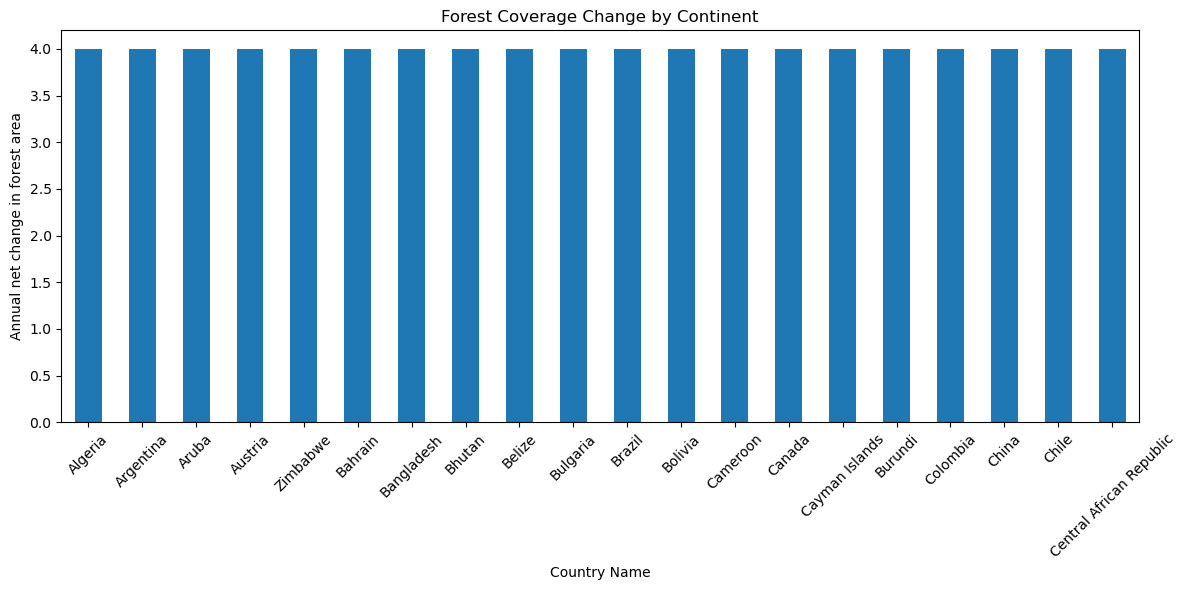

In [144]:
plt.figure(figsize=(12, 6))   
counts = forest_df["Entity"].value_counts()
top20 = counts.head(20)
top20.plot(kind="bar", rot=45)
plt.title("Forest Coverage Change by Continent")
plt.xlabel("Country Name")
plt.ylabel("Annual net change in forest area")
plt.tight_layout()
plt.show()